## Import Required Libraries

In [131]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


## Read dataset

In [132]:
df = pd.read_csv("KNNAlgorithmDataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preprocessing

### Drop Unwanted Columns

In [133]:
df = df.drop(columns=['id', 'Unnamed: 32'])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Change categorical Columns to Numerical

In [134]:
# Apply condition to change values in 'Age' column
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df['diagnosis'] = df['diagnosis'].astype('float64')

## EDA

In [135]:
df['diagnosis'].value_counts()

diagnosis
0.0    357
1.0    212
Name: count, dtype: int64

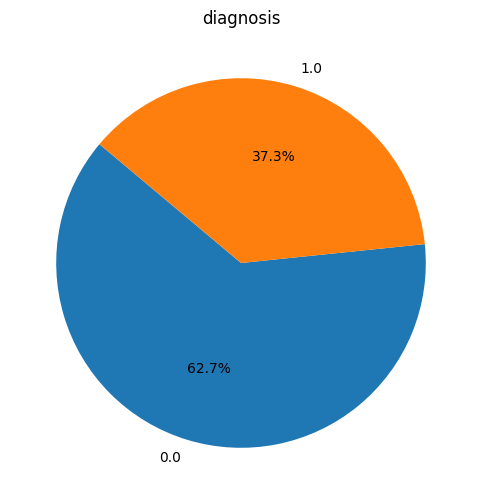

In [136]:
# Count each value in the column
value_counts = df['diagnosis'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('diagnosis')
plt.show()


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [138]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Define kNN Functions

In [139]:
# Custom function to split the DataFrame into training and test sets
def custom_train_test_split(df, target_column, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle the DataFrame
    shuffled_df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Separate features and labels
    X = shuffled_df.drop(target_column, axis=1).values
    y = shuffled_df[target_column].values

    # Calculate split index
    split_index = int(len(X) * (1 - test_size))

    # Split the data
    X_train = X[:split_index]
    X_test = X[split_index:]
    y_train = y[:split_index]
    y_test = y[split_index:]

    return X_train, X_test, y_train, y_test

# Define Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Define function to get k nearest neighbors
def get_neighbors(X_train, y_train, test_point, k):
    distances = []
    for i, train_point in enumerate(X_train):
        distance = euclidean_distance(test_point, train_point)
        distances.append((distance, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = [label for _, label in distances[:k]]
    return neighbors

# Define classification function
def classify(test_point, X_train, y_train, k):
    neighbors = get_neighbors(X_train, y_train, test_point, k)
    most_common = Counter(neighbors).most_common(1)
    return most_common[0][0]

# Define function to apply k-NN
def apply_knn(X_train, X_test, y_train, y_test, k):
    predictions = []
    for test_point in X_test:
        prediction = classify(test_point, X_train, y_train, k)
        predictions.append(prediction)

    accuracy = np.mean(np.array(predictions) == np.array(y_test))
    return accuracy, predictions


## Test the Model

In [140]:
# np.random.seed(42)

# Use the custom train-test split function
X_train, X_test, y_train, y_test = custom_train_test_split(df, target_column='diagnosis', test_size=0.3, random_state=0)

# Apply k-NN with varying k values
accs = []
for i in range(1, 200, 2):
    accuracy, predictions = apply_knn(X_train, X_test, y_train, y_test, k=i)
    accs.append("{:.5f}".format(accuracy))
    acc = "{:.5f}".format(accuracy)
    print(f"{i}:\t {acc}")

1:	 0.92982
3:	 0.92398
5:	 0.92982
7:	 0.92982
9:	 0.93567
11:	 0.92398
13:	 0.92982
15:	 0.92398
17:	 0.92398
19:	 0.92398
21:	 0.92398
23:	 0.91813
25:	 0.91813
27:	 0.91813
29:	 0.91813
31:	 0.91813
33:	 0.91228
35:	 0.91228
37:	 0.91228
39:	 0.91228
41:	 0.91228
43:	 0.91228
45:	 0.91228
47:	 0.91228
49:	 0.91228
51:	 0.91228
53:	 0.91228
55:	 0.91228
57:	 0.91228
59:	 0.91228
61:	 0.91228
63:	 0.91228
65:	 0.90643
67:	 0.90643
69:	 0.90643
71:	 0.90643
73:	 0.90643
75:	 0.90643
77:	 0.90643
79:	 0.90643
81:	 0.90643
83:	 0.90643
85:	 0.90643
87:	 0.91228
89:	 0.91228
91:	 0.91228
93:	 0.91228
95:	 0.91228
97:	 0.91228
99:	 0.90643
101:	 0.90643
103:	 0.90058
105:	 0.90058
107:	 0.90058
109:	 0.90058
111:	 0.90058
113:	 0.90058
115:	 0.90058
117:	 0.90058
119:	 0.89474
121:	 0.89474
123:	 0.89474
125:	 0.88889
127:	 0.89474
129:	 0.88889
131:	 0.88889
133:	 0.88889
135:	 0.88889
137:	 0.88889
139:	 0.88889
141:	 0.88889
143:	 0.88889
145:	 0.88889
147:	 0.88304
149:	 0.88304
151:	

## Plot the k vs Accuracy

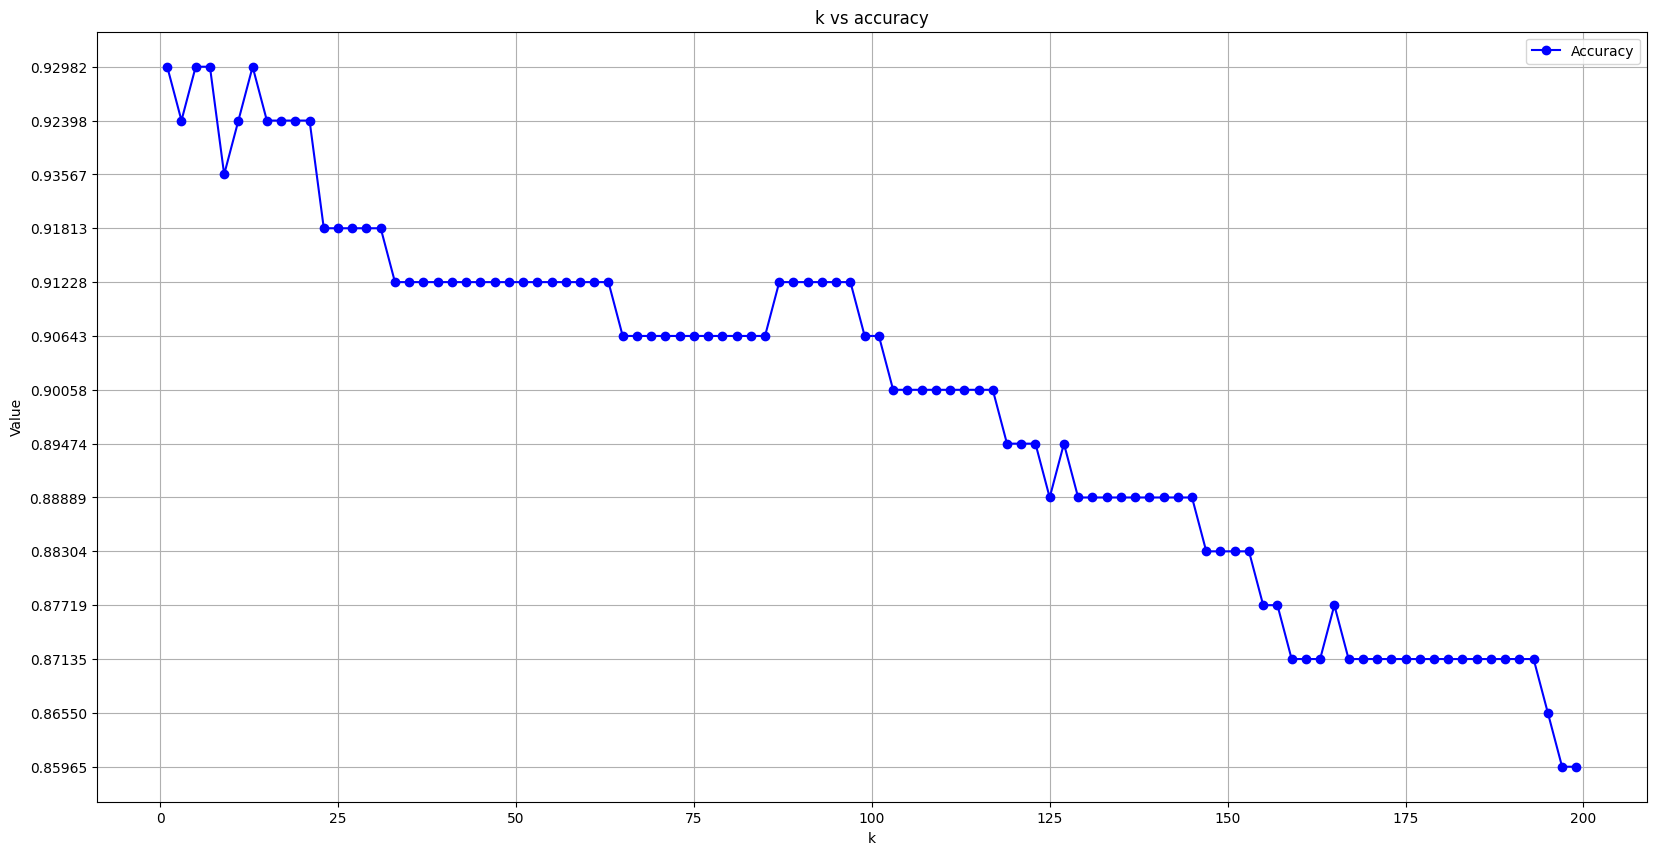

In [141]:
import matplotlib.pyplot as plt


# Generate x values as the indices of the data
x = list(range(1, len(accs)*2, 2))

# Create the plot
plt.figure(figsize=(20, 10))
plt.plot(x, accs, marker='o', linestyle='-', color='b', label='Accuracy')

# Add titles and labels
plt.title('k vs accuracy')
plt.xlabel('k')
plt.ylabel('Value')

# Invert the y-axis
plt.gca().invert_yaxis()

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
